# **Pandas for Time Series Data**

Features for working with time series data (Pandas):
* DateTime index
* Time Resampling
* Time Shifts
* Rolling and Expanding

# DateTime Index

In [46]:
from datetime import datetime
import pandas as pd

In [47]:
year = 2021
month = 4
day = 3

In [48]:
# date = datetime()

datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

The year, month and day arguments are required. tzinfo may be None, or an
instance of a tzinfo subclass. The remaining arguments may be ints.

In [49]:
date = datetime(year, month, day)
date

datetime.datetime(2021, 4, 3, 0, 0)

We can convert a list of two datetime objects to an index AND we can convert a NumPy array or list to an index with the following:

In [50]:
my_list = [datetime(2019,1,1), datetime(2019,1,2)]
dt_idx = pd.DatetimeIndex(my_list)
dt_idx

DatetimeIndex(['2019-01-01', '2019-01-02'], dtype='datetime64[ns]', freq=None)

# Time Resampling

When dealing with financial datasets we usually get data that has a DateTime index on a smaller scale (day, hour, minute, etc.). For the purpose of analysis, however, it is often a good idea to aggregate data based on some frequency (monthly, quarterly, etc.).

You might think that GroupBy can solve this, but it isn't made to understand things like business quarters, the start of a year, or the start of a week. Luckily, pandas has frequency sampling tools built-in to solve this.

To understand this, let's take a look at stock market data for Tesla from May 1st, 2018 - May 1st, 2019, which can be downloaded from Yahoo Finance.
- https://finance.yahoo.com/quote/TSLA/history?period1=1525147200&period2=1556683200&interval=1d&filter=history&frequency=1d

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Upload the data to Google Colab:

from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (1).csv


In [5]:
df = pd.read_csv('TSLA.csv')

The Date column is what we want to be the index, so we convert it to a datetime index with pd.to_datetime() and passing in the Series

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

If we call df.info() we can see it is now a datetime object:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


Let's now set the Date column as the index:

In [8]:
df.set_index('Date', inplace=True)

To simplify this, we could have also just set the index_col='Date' and set parse_dates=True.

We can then check the index with df.index:

In [9]:
df = pd.read_csv('TSLA.csv', index_col='Date', parse_dates=True)
df.index

DatetimeIndex(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04',
               '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14',
               ...
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

To do any sort of time resampling we need a datetime index, and then we can resample the DataFrame with df.resample() and then we pass in a rule.

The rule is just how we want to resample the data, and there are keywords for every type of time series offset strings.

- Resample documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

The rule is essentially acting as a GroupBy method specifically for time series data.

Let's look at an example of the A rule, which stands for "year-end frequency" and we will get the mean value based off the resampling:

In [10]:
# mean value based off the end of the year resampling
df.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,63.224225,64.546603,61.834722,63.235373,63.235373,4.676325e+07
2019-12-31,58.416854,59.369390,57.366512,58.458268,58.458268,4.565506e+07


In this example everything before 2018-12-31 had a mean Open value of $316.12.

Everything in between 2018-12-31 and 2019-12-31 had a mean of $291.44.

We can then get the mean value after quarterly resampling with the Q rule:

In [11]:
# quarterly resampling
df.resample(rule='Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-30,62.309861,63.616977,61.290884,62.438884,62.438884,4.290735e+07
2018-09-30,62.435397,63.720032,61.044635,62.483206,62.483206,5.125110e+07
2018-12-31,64.637144,66.007682,62.996000,64.531174,64.531174,4.490722e+07
2019-03-31,60.142754,61.161869,59.054525,60.223344,60.223344,4.245866e+07
2019-06-30,53.403524,54.162666,52.463238,53.331143,53.331143,5.493983e+07


# Time Shifts

Often time series forecasting models require us to shift our data forward and backward with a certain amount of time steps.
 Pandas makes this easy to do with the .shift() method.
 
 If we ever want to shift our time period up by one step we can use:

In [12]:
df.shift(periods=1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-02,58.702000,60.164001,58.644001,59.984001,59.984001,23128000.0
2018-05-03,59.714001,61.369999,59.556000,60.230000,60.230000,44852000.0
2018-05-04,55.757999,57.608002,55.046001,56.889999,56.889999,86760500.0
2018-05-07,56.599998,59.372002,55.903999,58.818001,58.818001,42847000.0


After this we can see that we no longer have any values for our first time period.

We can also shift the time period backwards by using -1 for our periodsargument.

# Pandas Rolling & Expanding

**IMPORTANT "OUT OF SECTION" NOTE:** 

look at "EWMA Models" for further details about Rolling and Simple Moving Averages (SMA)

We can use pandas' built-in rolling method, for example if we want to create a rolling mean based off a given time period.

When dealing with financial data often the daily data can be quite noisy.
To account for this, we can use the rolling mean (otherwise known as the Moving Average) to generate a signal about the general trend of the data.



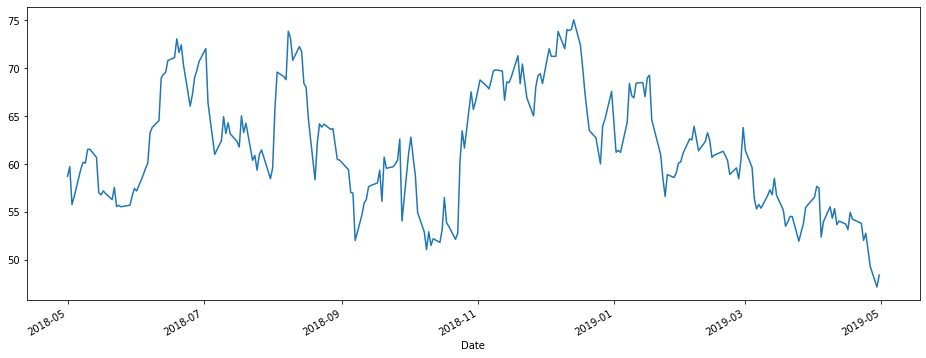

In [13]:
# Plot the data:
df['Open'].plot(figsize=(16,6))

Let's now average this out by the week - we can either get the Moving Average on a particular column or Series, or on the entire DataFrame with the .rolling()method.

To do this we pass in 7 as the window and then add the aggregate function .mean():

In [14]:
df.rolling(7).mean().head(14)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,58.645143,60.379715,58.284857,59.748572,59.748572,4.275221e+07
2018-05-10,59.044857,60.727429,58.595999,59.894286,59.894286,4.348507e+07
2018-05-11,59.305714,60.785429,58.633143,59.891715,59.891715,4.042021e+07


We can see the first 6 values are null, and the 7th value is the mean of the first 6 rows.

Let's now plot the Open column vs. the 7-day moving average of the Close column:

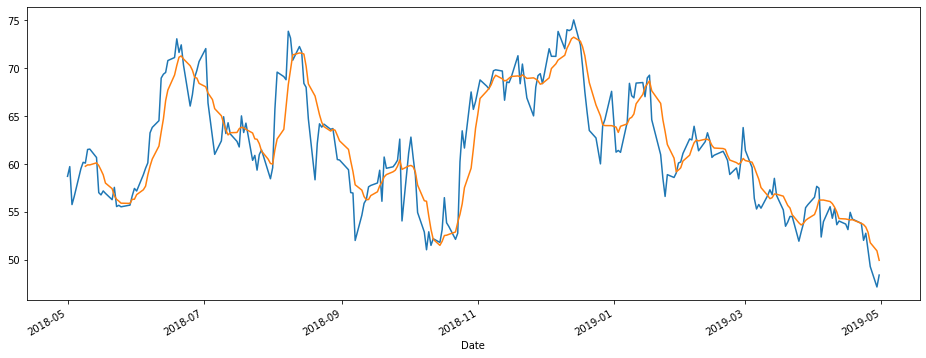

In [15]:
df['Open'].plot()
df.rolling(7).mean()['Close'].plot(figsize=(16,6))

When we look at this plot we see that the blue line is the Open price column, and the orange line is the rolling 7-day Close price. Now, what do we do when we take to take into account everything from the start of the time series to the rolling point of the value?

For example, instead of just taking into account a 7-day rolling window, we take into account everything since the beginning of the time series to where we are at that point. To do this we use the .expanding() method:

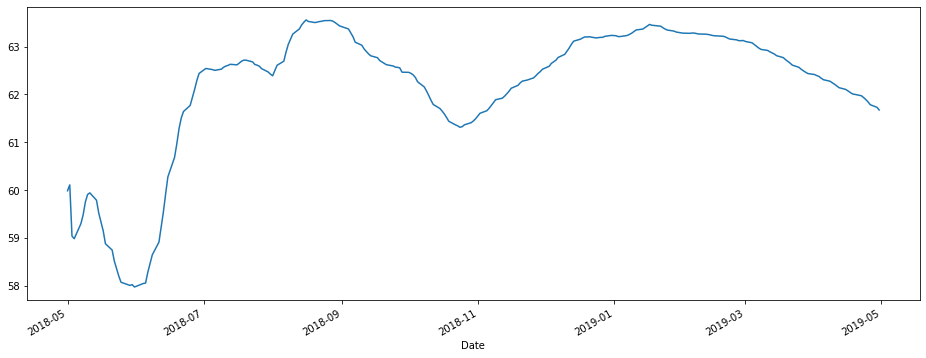

In [16]:
df['Close'].expanding().mean().plot(figsize=(16,6))

At each time step on the x-axis, what is shown on the y-axis is the value of everything that came before it averaged out.

# Bollinger Bands

We'll look at more fundamental & technical analysis later, but one closely related topics to .rolling() are Bollinger Bands so let's briefly discuss them.

Bollinger Bands are volatility bands placed above and below a moving average, where the volatility is based off the standard deviation which changes as volatility increases or decreases. The bands widen when volatility increases and narrow when it decreases.

To code Bollinger Bands with Pandas we need to create 3 columns and then we plot them out:



1. The first column is the Closing 20-day Moving Average
2. Then create the upper band equal to 20-day MA + 2x the standard deviation over 20 days
3. The lower band is equal to 20-day MA - 2x STD over 20 days


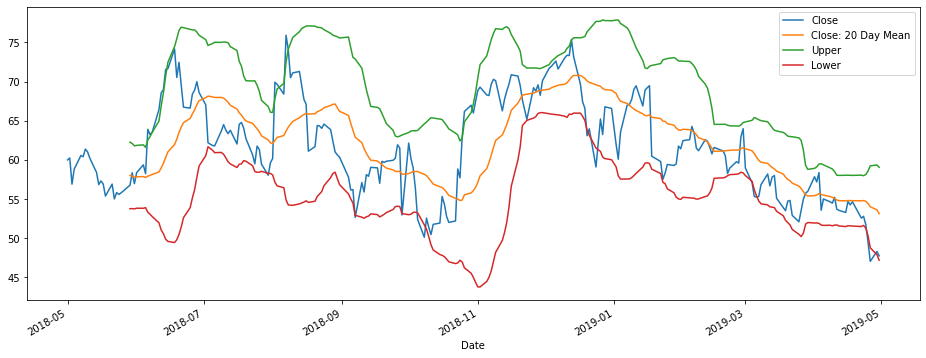

In [17]:
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()

# Upper = 20MA + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())

# Lower = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())

# Plot Close
df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6))

# **Time Series Analysis**

Now that we've learnt about Pandas for time series data, let's shift focus on analysis techniques.

Time series data has special properties and a different set of predictive algorithms than other types of data.

A lot of financial data comes in the form of some value plotted against a time series.

We'll discuss the following topics:

- Introduction to Statsmodel
- ETS Models & Decomposition
- EWMA Models
- ARIMA Models


# Introduction to Statsmodel

The most popular Python library for dealing with time series data is StatsModels:

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

StatsModels is heavily inspired by the statistical programming language R.

It allows users to explore data, estimate statistical models, and perform statistical tests.

Let's look at the time series analysis tsa module.

First we'll import statsmodels.api as sm and then load a dataset that comes with the library and then we'll load the macrodata dataset:

In [18]:
# import dataset with load_pandas method and .data attribute
import statsmodels.api as sm
df = sm.datasets.macrodata.load_pandas().data
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


We can check out what is in the dataset with the .NOTE attribute - this one is about economic data for the US.

Let's now set the year to be the time series index:

In [19]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))
df.index = index

Now that the year is a time series index, let's plot the realgdp column:



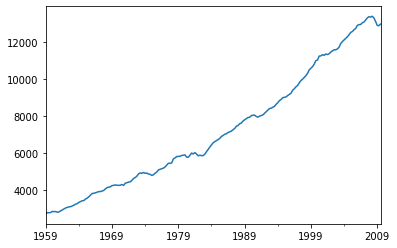

In [20]:
df['realgdp'].plot()

Let's do some analysis using statsmodel to get the trend of the data, and in this case we're going to use the Hodrick-Prescott filter:

- *sm.tsa.fi<ers.hpfi<er(df['realgdp'])*

- https://en.wikipedia.org/wiki/Hodrick–Prescott_filter 

This returns a tuple of the estimated cycle in the data and the estimated trend in the data.

We're then going to use tuple unpacking to get the trend and plot on top of this

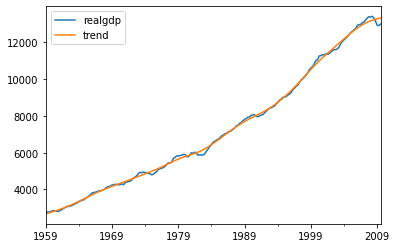

In [21]:
# let's use tuple unpacking to get this trend and plot it on top of this
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

# add a a column for the trend
df['trend'] = gdp_trend

# plot the real gdp & the trend
df[['realgdp','trend']].plot()

# ETS Models with StatsModels

ETS model stands for Error-Trend-Seasonality.

Let's take a look at the ETS components of a time series dataset.

ETS models take each of the terms (Error-Trend-Seasonality) for smoothing purposes and may add them, multiply them, or leave some of them out of the model.

Based off these key factors we can create a model to fit our data.

So how can we break down a time series into each of these terms?

Time Series Decomposition with ETS is a method of breaking down a time series into these components.

Here's how we would do ETS decomposition for the TSLA CSV:

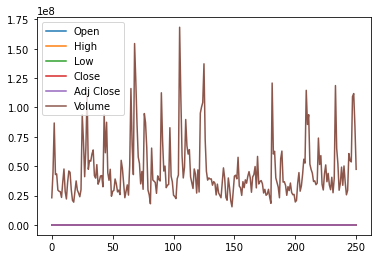

In [34]:
df = pd.read_csv('TSLA.csv')
df.plot()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Adj Close'], model='additive', freq=12)

And then we can plot out the components, for example the trend:

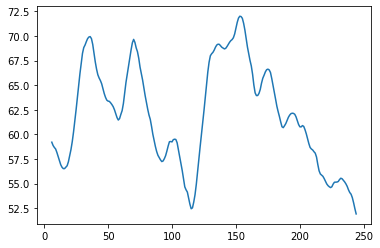

In [26]:
result.trend.plot()

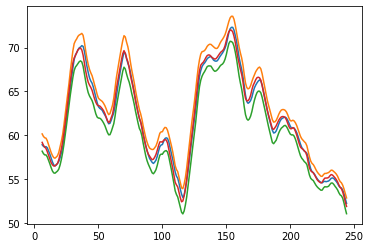

In [35]:
# Open
result = seasonal_decompose(df['Open'], model='additive', freq=12)
result.trend.plot()
# High 
result = seasonal_decompose(df['High'], model='additive', freq=12)
result.trend.plot()
# Low
result = seasonal_decompose(df['Low'], model='additive', freq=12)
result.trend.plot()
# Close
result = seasonal_decompose(df['Close'], model='additive', freq=12)
result.trend.plot()

# EWMA Models

EWMA stands for Exponentially Weighted Moving Average.
- https://www.investopedia.com/articles/07/ewma.asp

We saw that with pd.rolling() we can create a simple model that describes a trend of a time series - these are referred to as Simple Moving Averages (SMA).

A few of the weaknesses of SMA's include:
- A smaller windows will lead to more noise, rather than signal
- It will always lag the size of the window
- It will never reach the peak or valley of the data due to averaging
- It doesn't inform us about future behavior, it really just describes trends in the data
- Extreme historical values can skew the SMA
To recap, here's how we can calculate the 30-day SMA for TSLA:

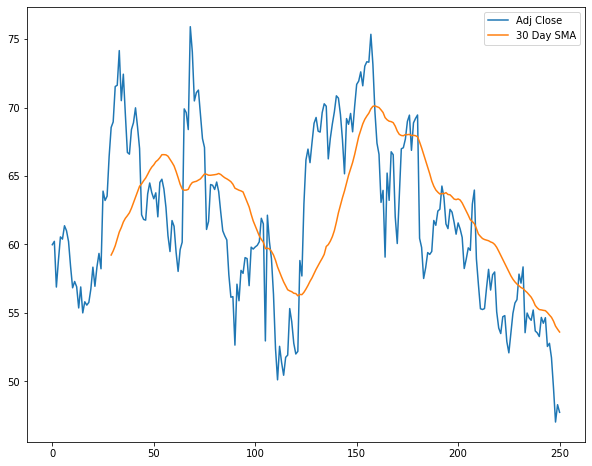

In [36]:
# create 1 month SMA off of Adj Close
df['30 Day SMA'] = df['Adj Close'].rolling(window=30).mean()

# plot SMA & Adj Close
df[['Adj Close', '30 Day SMA']].plot(figsize=(10,8))

Exponentially Weighted Moving Averages solve some of these issues, in particular:

- EWMA allows you to reduce the lag time from SMA and puts more weight on values that occur more recently
- The amount of weight applied to the recent values depends on the parameters used in the EWMA and the number of periods in the window size

Here's how we can create an EWMA model:

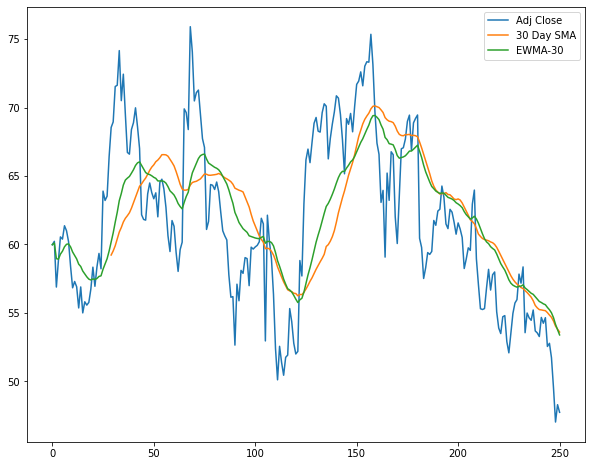

In [38]:
# create EWMA
df['EWMA-30'] = df['Adj Close'].ewm(span=30).mean()

# plot EWMA (and SMA)
df[['Adj Close', '30 Day SMA','EWMA-30']].plot(figsize=(10,8))

We can see the behavior at the beginning is different from at the end - this is because we've weighted the most recent points more heavily.

# ARIMA

Although ARIMA models are one of the most common time series models, they often don't work well with historical market data so we won't cover them here.

If you want to learn more about ARIMA models check out this article from Machine Learning Mastery.

- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

# **Summary: Time Series Analysis with Python**

In this guide we reviewed time series analysis for financial data with Python.

We saw that time series problems are different from traditional prediction problems and looked at Pandas for time series data, as well as several time series analysis techniques.

The statsmodel library is the most popular Python library for dealing with time series data is
We saw how we can use statsmodels for ETS (Error-Trend-Seasonality) models
We also looked at Simple and Exponentially Weighted Moving Averages (SMA & EWMA) for time series analysis

**Resources**
- https://click.linksynergy.com/link?id=3cApt3xu22g&offerid=507388.1212032&type=2&murl=https%3A%2F%2Fwww.udemy.com%2Fcourse%2Fpython-for-finance-and-trading-algorithms%2F